<a href="https://colab.research.google.com/github/VaishnaviS2504/CodeAlpha_EDA/blob/main/EDA_of_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas matplotlib seaborn wordcloud

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [4]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [31]:
books = pd.read_csv('booksEDA.csv')
books.head()

,title,author,genre,rating,price,stock
0,The Silent Patient,James Clear,Thriller,3.9,299,In Stock
1,Atomic Habits,James Clear,Self-help,4.5,350,In Stock
2,Educated,James Clear,Memoir,4.2,420,Out of Stock
3,Becoming,George Orwell,Autobiography,4.8,500,In Stock
4,The Alchemist,George Orwell,Fiction,3.7,280,Out of Stock


In [32]:
books.info()
print("Missing values:\n", books.isnull().sum())
print("Duplicate Rows:", books.duplicated().sum())

books.drop_duplicates(inplace=True)

books.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   10 non-null     object 
 1   author  10 non-null     object 
 2   genre   10 non-null     object 
 3   rating  10 non-null     float64
 4   price   10 non-null     int64  
 5   stock   10 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 612.0+ bytes
Missing values:
 title     0
author    0
genre     0
rating    0
price     0
stock     0
dtype: int64
Duplicate Rows: 0


,title,author,genre,rating,price,stock
count,10,10,10,10.000000,10.000000,10
unique,10,6,9,NaN,NaN,2
top,The Silent Patient,James Clear,Fiction,NaN,NaN,In Stock
freq,1,3,2,NaN,NaN,6
mean,NaN,NaN,NaN,4.340000,367.400000,NaN
std,NaN,NaN,NaN,0.380643,76.882594,NaN
min,NaN,NaN,NaN,3.700000,275.000000,NaN
25%,NaN,NaN,NaN,4.125000,301.750000,NaN
50%,NaN,NaN,NaN,4.350000,370.000000,NaN
75%,NaN,NaN,NaN,4.575000,415.000000,NaN


#Univariate Analysis

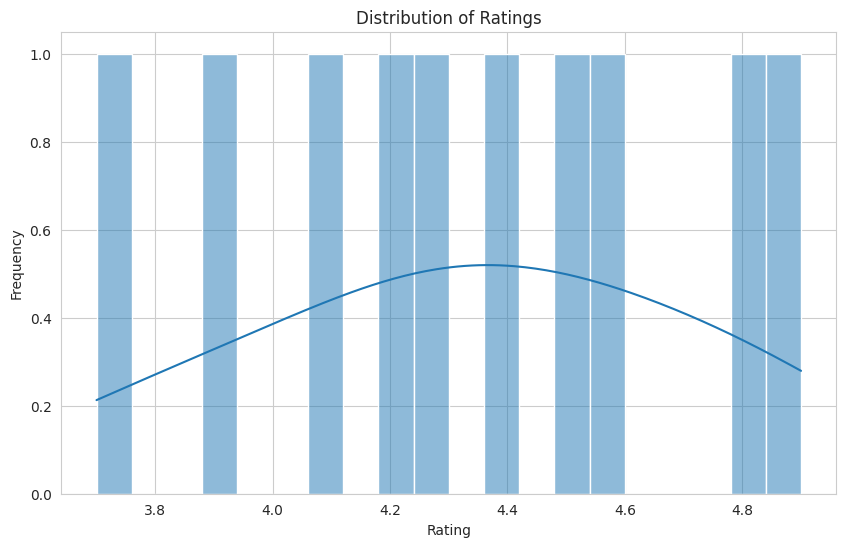

In [33]:
#1. Ratings Distribution
sns.histplot(books['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


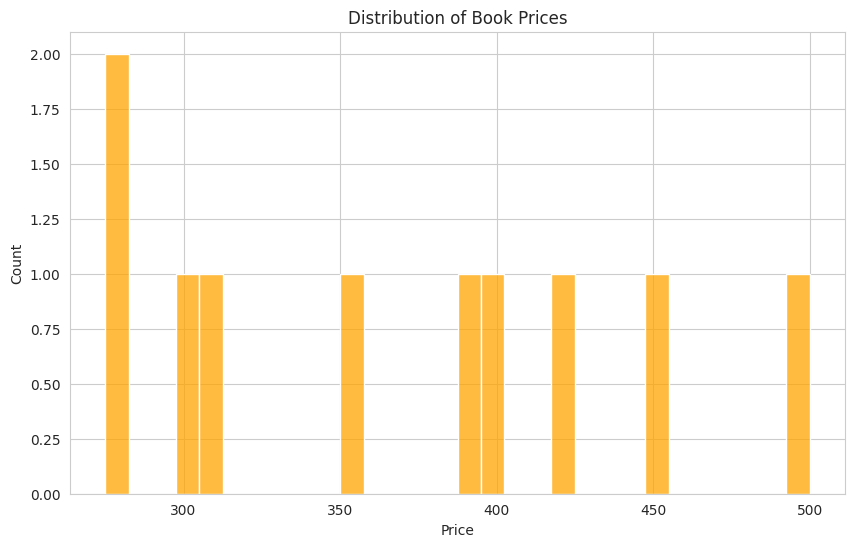

In [34]:
#2. Price Distribution
sns.histplot(books['price'], bins=30, color='orange')
plt.title('Distribution of Book Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


<ipython-input-41-7c08a0c9edba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stock_count.index, y=stock_count.values, palette='pastel')


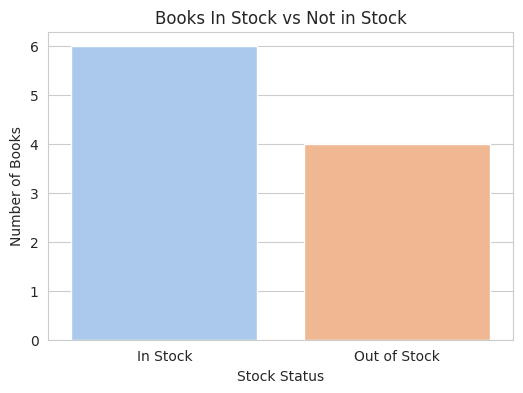

In [41]:
#Books in Stock vs Not in Stock
stock_count = books['stock'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=stock_count.index, y=stock_count.values, palette='pastel')
plt.title('Books In Stock vs Not in Stock')
plt.xlabel('Stock Status')
plt.ylabel('Number of Books')
plt.show()


Word Cloud of Book Titles

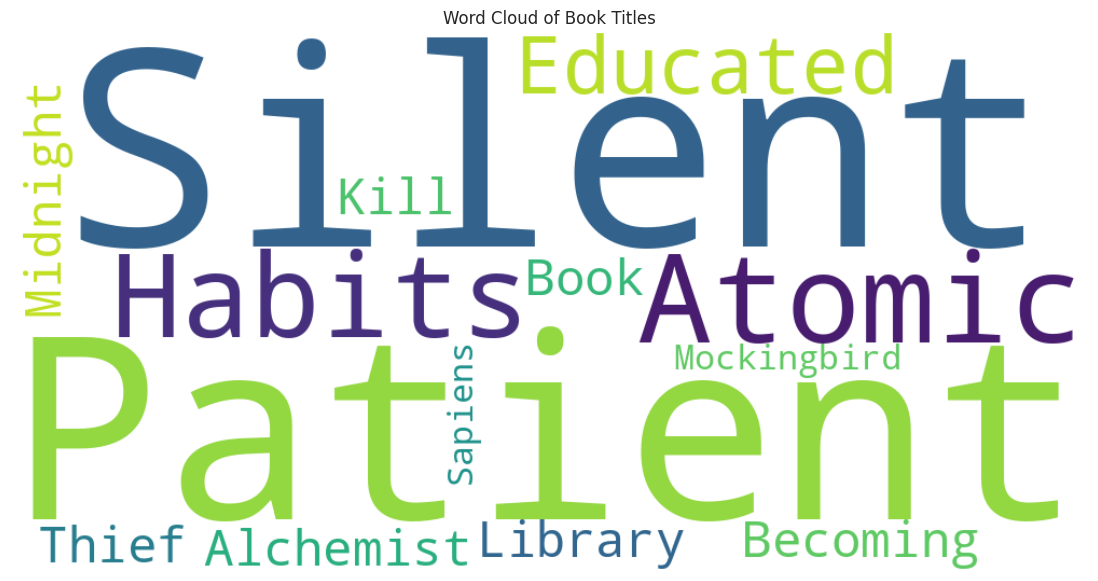

In [35]:

title_text = ' '.join(books['title'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(title_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Book Titles")
plt.show()


#Bivariate Analysis

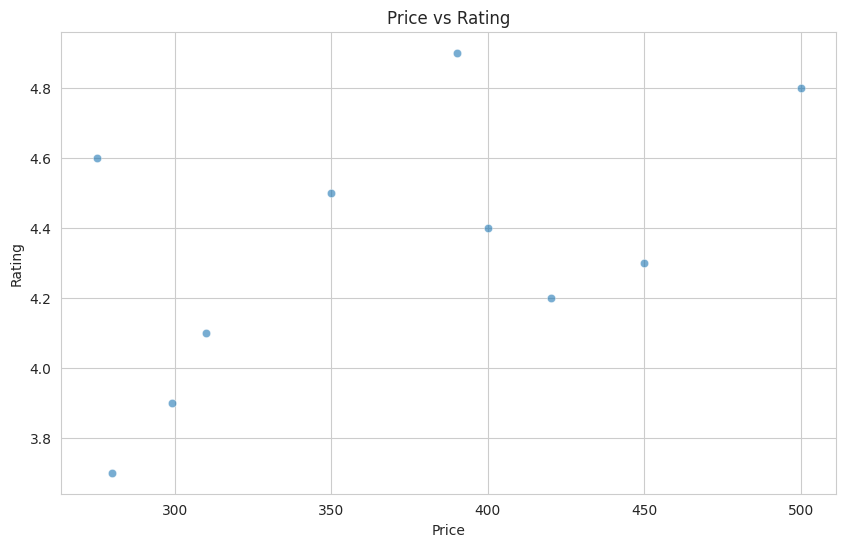

In [36]:
#Rating vs Price
sns.scatterplot(data=books, x='price', y='rating', alpha=0.6)
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


<ipython-input-37-40640bfd5d7b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated, x='rating', y='title', palette='viridis')


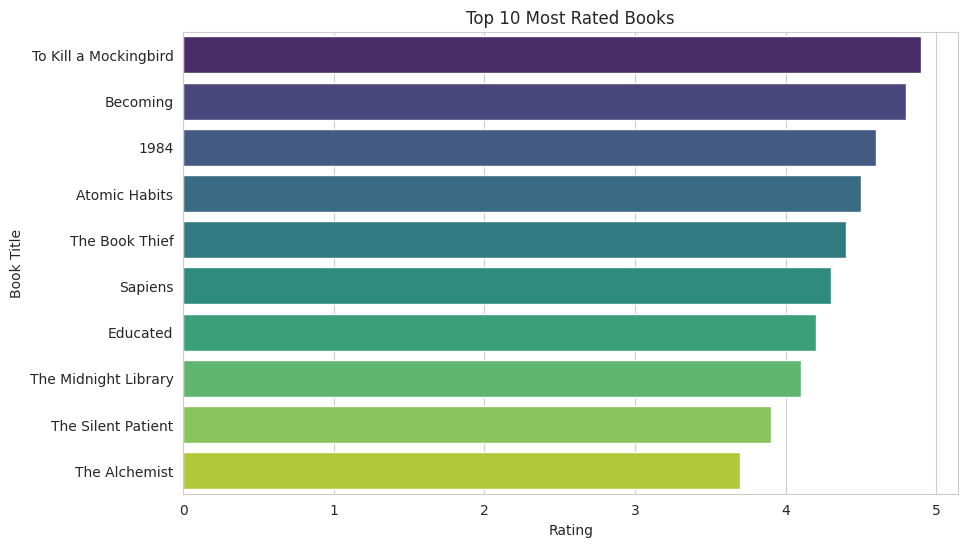

In [37]:
#Top 10 Most Rated Books
top_rated = books.sort_values(by='rating', ascending=False).head(10)
sns.barplot(data=top_rated, x='rating', y='title', palette='viridis')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Rating')
plt.ylabel('Book Title')
plt.show()


#Correlation Heatmap

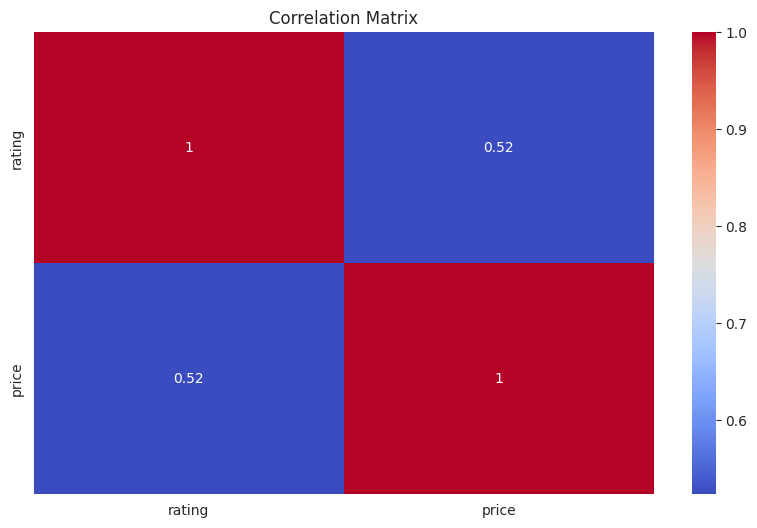

In [38]:

correlation_matrix = books.select_dtypes(include=[np.number]).corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#Most Common Authors

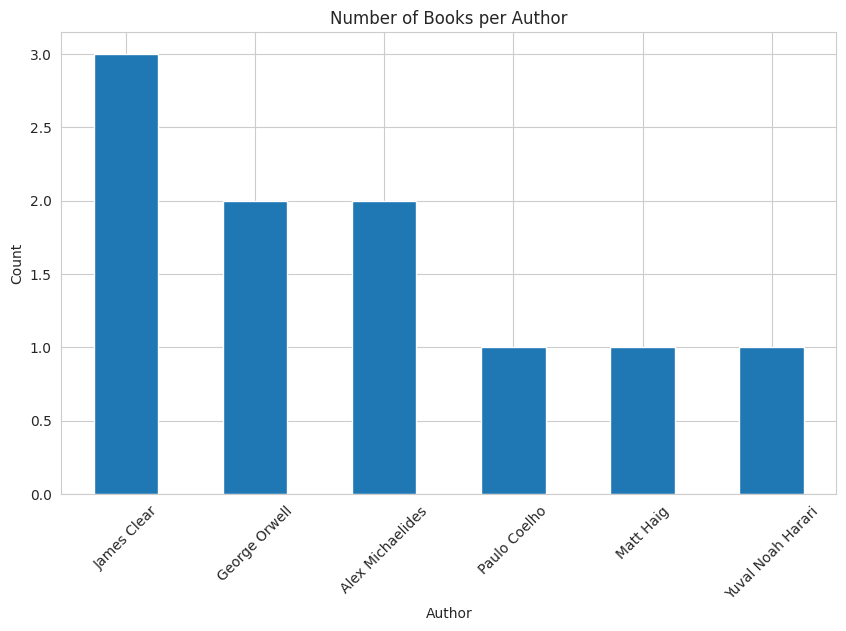

In [39]:
books['author'].value_counts().plot(kind='bar')
plt.title('Number of Books per Author')
plt.xlabel('Author')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
